In [29]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from typing import Tuple

In [30]:
def get_mass_center(image) -> Tuple[int]:
    M = cv2.moments(image, 1)
    x = int(M['m10']/M['m00'])
    y = int(M['m01']/M['m00'])
    return x, y


In [31]:
def get_max_size(X: np.ndarray, Y: np.ndarray) -> float:
    x = np.vstack([X for _ in range(len(X))])
    y = np.vstack([Y for _ in range(len(Y))])
    return np.sqrt(np.max((x - x.T)**2 + (y - y.T)**2))

In [32]:
def hausdorff_distance(contour1, contour2) -> float:
    return max(_Hd(contour1, contour2), _Hd(contour1, contour2))

def _Hd(contour1, contour2):
    return np.max(np.min(np.array([[np.linalg.norm(p1 - p2) for p2 in contour2] for p1 in contour1]), axis=1))

In [33]:
def normalised_contour(
        image
):
    contours, _ = cv2.findContours(cv2.bitwise_not((image>1).astype(np.uint8)), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    x_, y_ = get_mass_center(image)
    x = contours[0][:,0,0] - x_
    y = contours[0][:,0,1] - y_

    s = get_max_size(x, y)
    x = x/s
    y = y/s
    
    return x, y

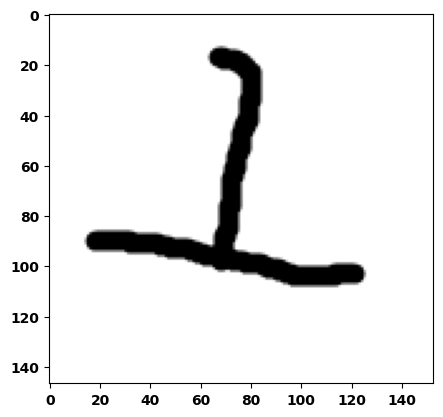

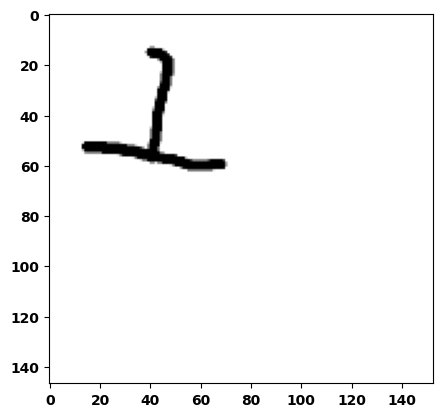

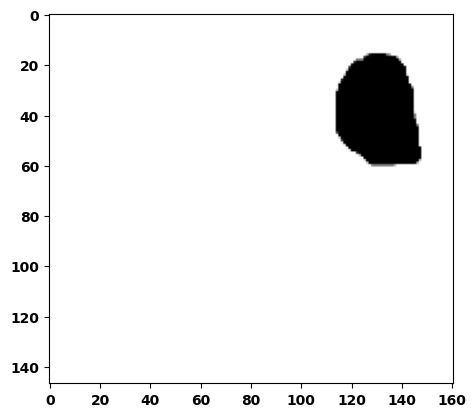

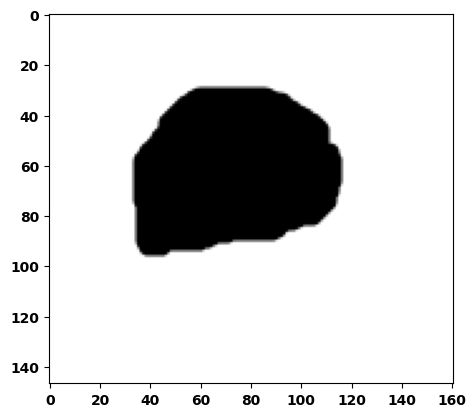

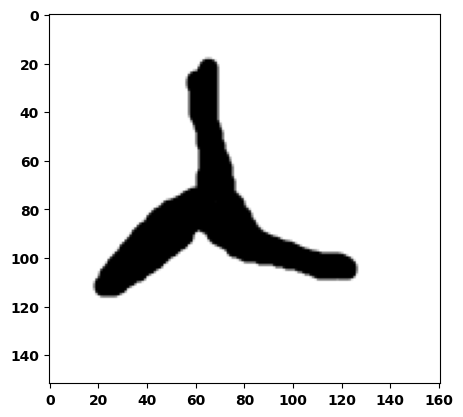

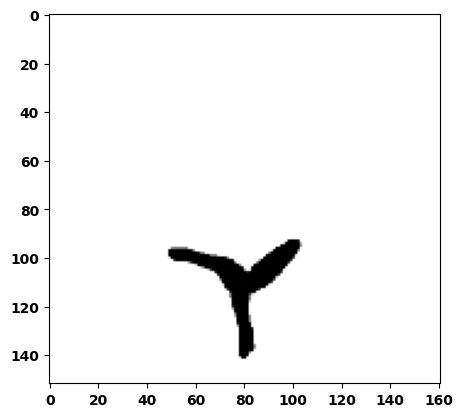

In [34]:
# Load images
images = []
for name in ("i", "j", "k"):
    for i in range(1, 3):
        images.append(cv2.imread(f"data/{name}_{i}.png", cv2.IMREAD_GRAYSCALE))
        plt.imshow(images[-1], cmap="gray")
        plt.show()


In [35]:
contours = []
for image in images:
    x, y = normalised_contour(image)
    contour = np.vstack([x, y]).T
    contours.append(contour)

for i, c1 in enumerate(contours):
    for j, c2 in enumerate(contours):
        print(i, j, hausdorff_distance(c1, c2))



0 0 0.0
0 1 0.004744721468115443
0 2 0.02271125659045703
0 3 0.023431200077459066
0 4 0.007911843128740865
0 5 0.005728749750070344
1 0 0.004744721468115443
1 1 0.0
1 2 0.02271125659045703
1 3 0.0187152605942863
1 4 0.010258819461884321
1 5 0.010258819461884321
2 0 0.022713501469124268
2 1 0.022713501469124268
2 2 0.0
2 3 0.019035486109761045
2 4 0.0246776981243177
2 5 0.020260993178891275
3 0 0.02343337598683233
3 1 0.018717984725455303
3 2 0.019035486109761045
3 3 0.0
3 4 0.022319608958154453
3 5 0.022319608958154453
4 0 0.007936020023320972
4 1 0.010277476775370688
4 2 0.024213796997312645
4 3 0.022321915397867383
4 4 0.0
4 5 0.004545407589007122
5 0 0.005762093874250783
5 1 0.010277476775370688
5 2 0.019693324374193202
5 3 0.022321915397867383
5 4 0.004545407589007122
5 5 0.0
